In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [7]:
fi1=pd.read_csv('items.csv')
fs1=pd.read_excel('sales_2023.xlsx',engine='openpyxl')
fs2=pd.read_excel('sales_2024.xlsx',engine='openpyxl')
print(fs1)
print(fs2)

    tid region  Year  sale_qty
0   101  north  2023        32
1   101  south  2023        16
2   102  north  2023        10
3   102  south  2023        12
4   103  north  2023         5
5   103  south  2023        92
6   104  north  2023         8
7   104  south  2023        15
8   105  south  2023        25
9   101   east  2023        32
10  101   west  2023        16
11  102   east  2023        10
12  102   west  2023        12
13  103   east  2023        56
14  103   west  2023        36
15  104   east  2023         2
16  104   west  2023        15
17  105   west  2023        25
    tid region  Year  sale_qty
0   101  north  2024         3
1   101  south  2024        44
2   102  north  2024        55
3   102  south  2024        23
4   103  north  2024        90
5   103  south  2024         4
6   104  north  2024         8
7   104  south  2024        15
8   105  south  2024        34
9   101   east  2024        32
10  101   west  2024        77
11  102   east  2024         8
12  102 

In [6]:
mf=pd.merge(fi1,fs1,left_on='id',right_on='tid')
mf

,id,name,price,stock,tid,region,Year,sale_qty
0,101,LEDTV,10000,1200,101,north,2023,32
1,101,LEDTV,10000,1200,101,south,2023,16
2,101,LEDTV,10000,1200,101,east,2023,32
3,101,LEDTV,10000,1200,101,west,2023,16
4,102,MobilePhone,1000,800,102,north,2023,10
5,102,MobilePhone,1000,800,102,south,2023,12
6,102,MobilePhone,1000,800,102,east,2023,10
7,102,MobilePhone,1000,800,102,west,2023,12
8,103,Laptop,13000,900,103,north,2023,5
9,103,Laptop,13000,900,103,south,2023,92


In [8]:
mf2=pd.merge(mf,fs2,left_on='id',right_on='tid')
mf2

,id,name,price,stock,tid_x,region_x,Year_x,sale_qty_x,tid_y,region_y,Year_y,sale_qty_y
0,101,LEDTV,10000,1200,101,north,2023,32,101,north,2024,3
1,101,LEDTV,10000,1200,101,north,2023,32,101,south,2024,44
2,101,LEDTV,10000,1200,101,north,2023,32,101,east,2024,32
3,101,LEDTV,10000,1200,101,north,2023,32,101,west,2024,77
4,101,LEDTV,10000,1200,101,south,2023,16,101,north,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...
63,104,DesktopPC,9000,890,104,west,2023,15,104,west,2024,15
64,105,Camera,7000,500,105,south,2023,25,105,south,2024,34
65,105,Camera,7000,500,105,south,2023,25,105,west,2024,50
66,105,Camera,7000,500,105,west,2023,25,105,south,2024,34


In [11]:
gpo=mf2.groupby('name')
print(gpo)

In [14]:
rf1=gpo.sum(numeric_only='True')
rf2=rf1.reset_index()


In [15]:
print(rf2)

          name    id   price  stock  tid_x  Year_x  sale_qty_x  tid_y  Year_y  \
0       Camera   420   28000   2000    420    8092         100    420    8096   
1    DesktopPC  1664  144000  14240   1664   32368         160   1664   32384   
2        LEDTV  1616  160000  19200   1616   32368         384   1616   32384   
3       Laptop  1648  208000  14400   1648   32368         756   1648   32384   
4  MobilePhone  1632   16000  12800   1632   32368         176   1632   32384   

   sale_qty_y  
0         168  
1         232  
2         624  
3         496  
4         392  


In [18]:
ff=rf2[['name','sale_qty_x','sale_qty_y']]
print(ff)


          name  sale_qty_x  sale_qty_y
0       Camera         100         168
1    DesktopPC         160         232
2        LEDTV         384         624
3       Laptop         756         496
4  MobilePhone         176         392


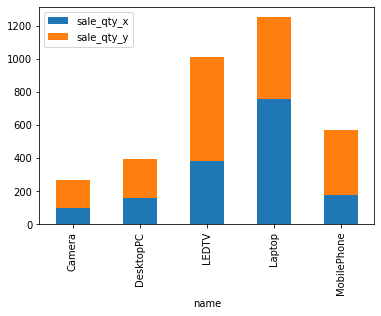

In [19]:
ff.plot(kind='bar',x='name',y=['sale_qty_x','sale_qty_y'],stacked='True')
plt.show()

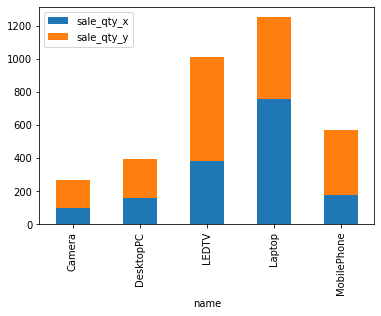

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
fi1=pd.read_csv('items.csv')
fs1=pd.read_excel('sales_2023.xlsx',engine='openpyxl') #no need to use engine="" in linux
fs2=pd.read_excel('sales_2024.xlsx',engine='openpyxl')
mf=pd.merge(fi1,fs1,left_on='id',right_on='tid')
mf2=pd.merge(mf,fs2,left_on='id',right_on='tid')
gpo=mf2.groupby('name')
rf1=gpo.sum(numeric_only='True')
rf2=rf1.reset_index()
ff=rf2[['name','sale_qty_x','sale_qty_y']] #since 2023 sale_qty got renamed as sale_qty_x after merging
ff.plot(kind='bar',x='name',y=['sale_qty_x','sale_qty_y'],stacked='True')
plt.show()
